In [74]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# TRAIN

In [75]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [76]:
train.reset_index(drop=True)

,suma,distancias,entropia_total,entropias,mutual_info,m_earth,max_info_p,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,Match,CLASS
0,0.000000,0.00000,3.583,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,5,0,40,NaN,YES
1,0.000000,135.29070,3.805,0.000,0.000000,0.000000,0.000000,1.000000,0,0,1,6,0,39,| related_to +,NO
2,0.000000,101.96600,5.616,0.000,0.000000,0.000000,0.000000,1.000000,1,0,0,10,0,45,| derived_from +,UNKNOWN
3,0.000000,0.00000,5.407,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,7,0,60,NaN,YES
4,-0.442936,142.35385,5.179,3.880,4.089147,0.002735,0.231184,-0.106360,0,0,0,8,1,22,NaN,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.449538,80.40987,5.186,3.974,4.006609,0.002715,0.576517,0.268804,0,0,0,8,1,25,NaN,UNKNOWN
796,0.000000,0.00000,5.390,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,12,0,35,NaN,YES
797,0.000000,0.00000,5.169,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,8,0,29,NaN,UNKNOWN
798,0.000000,0.00000,5.512,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,8,0,31,NaN,NO


<Axes: title={'center': 'Rel_conceptuales'}, xlabel='CLASS'>

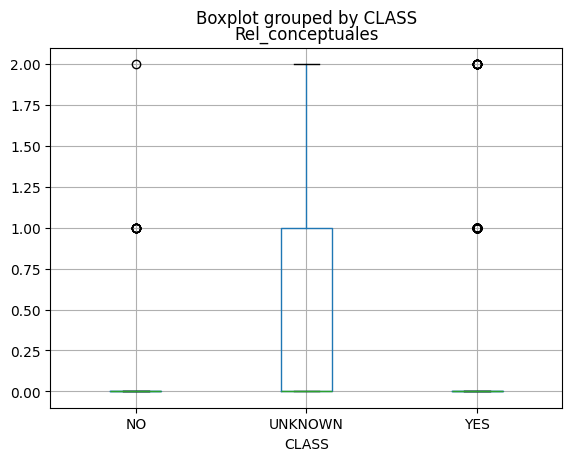

In [77]:
train.boxplot(by="CLASS",column="Rel_conceptuales")

## Eliminar características

In [78]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["Match","entropia_total","max_info_p","suma"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,CLASS
0,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,5,0,40,YES
1,135.29070,0.000,0.000000,0.000000,1.000000,0,0,1,6,0,39,NO
2,101.96600,0.000,0.000000,0.000000,1.000000,1,0,0,10,0,45,UNKNOWN
3,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,7,0,60,YES
4,142.35385,3.880,4.089147,0.002735,-0.106360,0,0,0,8,1,22,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
95,80.40987,3.974,4.006609,0.002715,0.268804,0,0,0,8,1,25,UNKNOWN
96,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,12,0,35,YES
97,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,8,0,29,UNKNOWN
98,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,8,0,31,NO


In [79]:
#train["entropia_total"] = train["entropia_total"] -train["entropias"]
#train

In [80]:
train=train.drop(["entropias"],axis=1)

In [81]:
train["Shape Origin"] = train["Shape Origin"] / train["Total T"]
train["Shape Finish"] = train["Shape Finish"] / train["Total T"]

In [82]:
train=train.drop(["Total T"],axis=1)

In [83]:
train

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,CLASS
0,0.00000,0.000000,0.000000,1.000000,0,0,0,0.125000,0.000000,YES
1,135.29070,0.000000,0.000000,1.000000,0,0,1,0.153846,0.000000,NO
2,101.96600,0.000000,0.000000,1.000000,1,0,0,0.222222,0.000000,UNKNOWN
3,0.00000,0.000000,0.000000,1.000000,0,0,0,0.116667,0.000000,YES
4,142.35385,4.089147,0.002735,-0.106360,0,0,0,0.363636,0.045455,YES
...,...,...,...,...,...,...,...,...,...,...
95,80.40987,4.006609,0.002715,0.268804,0,0,0,0.320000,0.040000,UNKNOWN
96,0.00000,0.000000,0.000000,1.000000,0,0,0,0.342857,0.000000,YES
97,0.00000,0.000000,0.000000,1.000000,0,0,0,0.275862,0.000000,UNKNOWN
98,0.00000,0.000000,0.000000,1.000000,0,0,0,0.258065,0.000000,NO


## Guardar valores

In [84]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [85]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['CLASS'],axis=1).corr(method='pearson')

In [86]:
train_m

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish
distancias,1.000000,0.450296,0.234322,-0.240810,0.243213,0.270867,0.360808,0.316295,0.737374
mutual_info,0.450296,1.000000,0.450576,-0.814836,-0.010143,0.021992,0.051454,0.087851,0.483790
m_earth,0.234322,0.450576,1.000000,-0.511160,-0.011506,0.007905,0.001523,0.085001,0.302845
sim_faltantes,-0.240810,-0.814836,-0.511160,1.000000,0.035266,0.017444,0.057503,0.006648,-0.262157
Compatibilidad,0.243213,-0.010143,-0.011506,0.035266,1.000000,0.022555,0.019378,0.146032,0.101117
Incompatibilidad,0.270867,0.021992,0.007905,0.017444,0.022555,1.000000,-0.025498,0.085308,0.142040
Rel_conceptuales,0.360808,0.051454,0.001523,0.057503,0.019378,-0.025498,1.000000,0.119098,0.155429
Shape Origin,0.316295,0.087851,0.085001,0.006648,0.146032,0.085308,0.119098,1.000000,0.602976
Shape Finish,0.737374,0.483790,0.302845,-0.262157,0.101117,0.142040,0.155429,0.602976,1.000000


<Axes: >

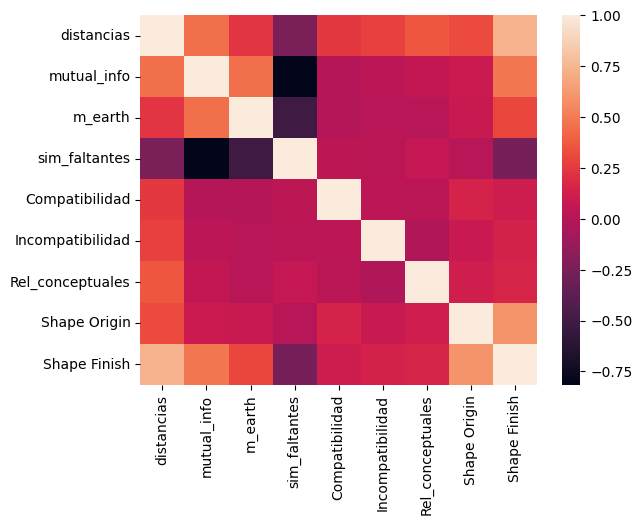

In [87]:
sns.heatmap(train_m)

In [26]:
train_m

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T
distancias,1.000000,0.450296,0.234322,-0.240810,0.243213,0.270867,0.360808,0.408811,0.872214,-0.009451
mutual_info,0.450296,1.000000,0.450576,-0.814836,-0.010143,0.021992,0.051454,0.039543,0.577970,-0.064094
m_earth,0.234322,0.450576,1.000000,-0.511160,-0.011506,0.007905,0.001523,0.003078,0.321795,-0.099422
sim_faltantes,-0.240810,-0.814836,-0.511160,1.000000,0.035266,0.017444,0.057503,0.067994,-0.321123,0.031326
Compatibilidad,0.243213,-0.010143,-0.011506,0.035266,1.000000,0.022555,0.019378,0.143828,0.081884,-0.033497
Incompatibilidad,0.270867,0.021992,0.007905,0.017444,0.022555,1.000000,-0.025498,0.105942,0.137953,-0.006443
Rel_conceptuales,0.360808,0.051454,0.001523,0.057503,0.019378,-0.025498,1.000000,0.106820,0.175628,-0.082952
Shape Origin,0.408811,0.039543,0.003078,0.067994,0.143828,0.105942,0.106820,1.000000,0.403163,0.058778
Shape Finish,0.872214,0.577970,0.321795,-0.321123,0.081884,0.137953,0.175628,0.403163,1.000000,-0.059732
Total T,-0.009451,-0.064094,-0.099422,0.031326,-0.033497,-0.006443,-0.082952,0.058778,-0.059732,1.000000


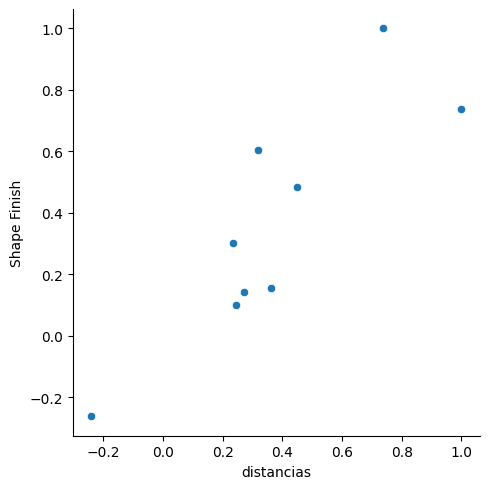

In [88]:
# Checar variables colineales
sns.relplot(data=train_m, x="distancias", y="Shape Finish")

In [89]:
# RTE3 valores de las clases
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

## Scaler 

In [30]:
#scaler = preprocessing.StandardScaler().fit(X)
#X_scaled = scaler.transform(X)
#X = X_scaled
#X_train=X

In [90]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

In [91]:
#scaler = preprocessing.MinMaxScaler().fit(X)
#X_scaled = scaler.transform(X)
#X = X_scaled
#X_train=X

In [92]:
#scaler = preprocessing.Normalizer().fit(X)
#X_scaled = scaler.transform(X)
#X = X_scaled
#X_train=X

In [93]:
#scaler = preprocessing.RobustScaler().fit(X)
#X_scaled = scaler.transform(X)
#X = X_scaled
#X_train=X

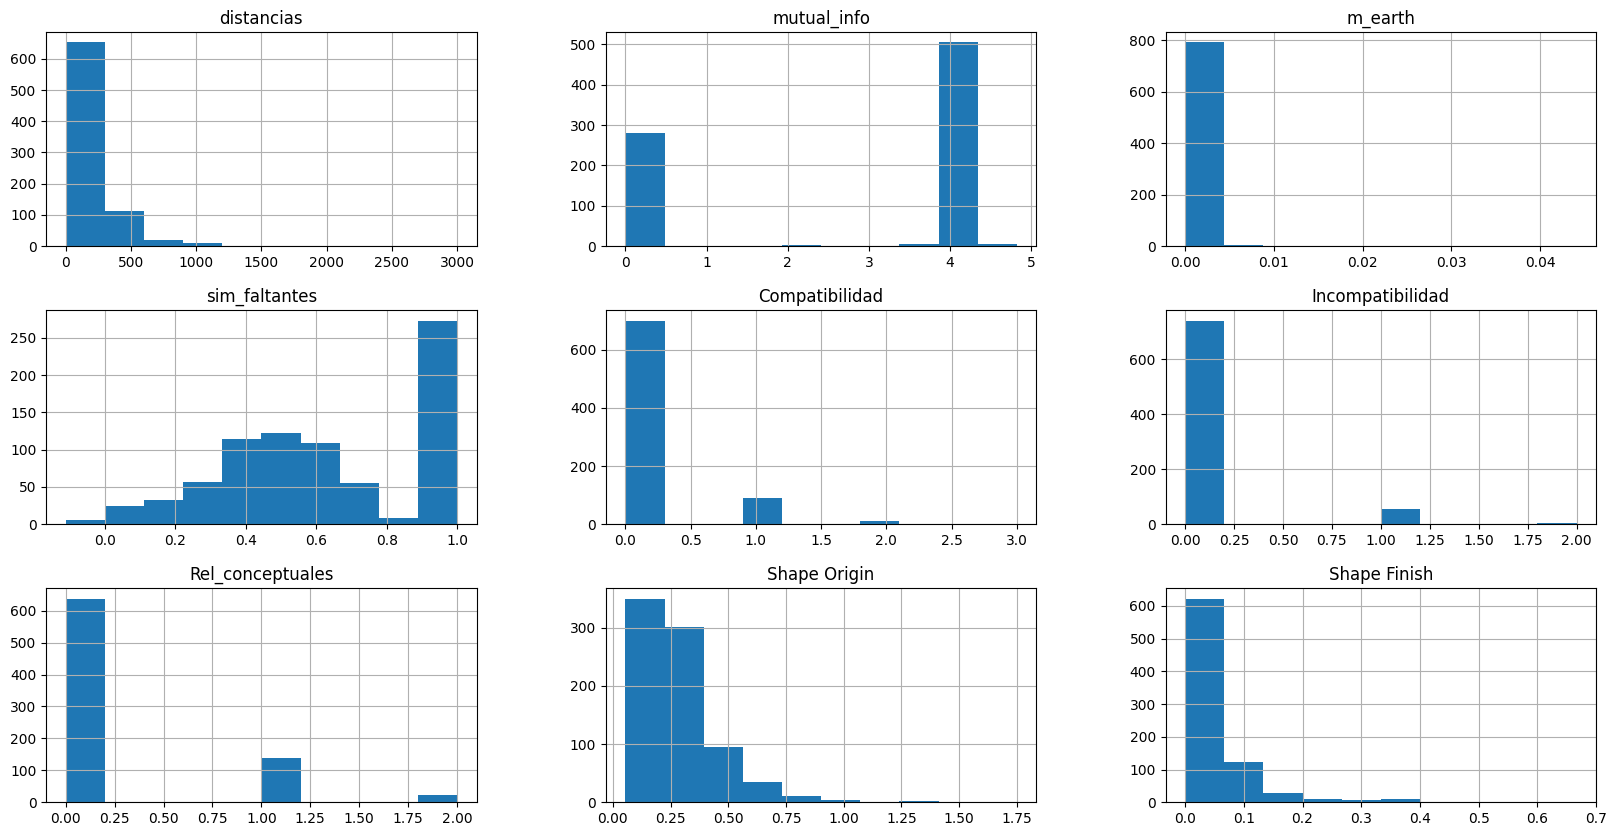

In [94]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [95]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [96]:
test=test.reset_index(drop=True)
test

,suma,distancias,entropia_total,entropias,mutual_info,m_earth,max_info_p,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,Match,CLASS
0,8.630107,181.71378,5.081,4.210,4.691659,0.000000,1.000000,0.579012,0,0,1,7,1,26,| related_to +,ENTAILMENT
1,4.096975,1695.09420,5.692,5.659,3.948094,0.003109,0.423813,0.768742,0,0,1,40,21,17,| related_to +,NONENTAILMENT
2,6.543147,1146.50070,5.767,5.660,4.016602,0.002445,0.434243,0.659515,0,1,0,20,10,35,| is_a_c +,NONENTAILMENT
3,0.000000,136.25632,4.989,0.000,0.000000,0.000000,0.000000,1.000000,2,0,0,8,0,18,| synonym + | synonym +,ENTAILMENT
4,2.474558,1742.13040,5.884,5.768,3.919306,0.003232,0.369453,0.588275,0,0,2,40,21,15,| related_to + | related_to +,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.728646,1933.46800,5.876,5.731,4.011618,0.002651,0.359757,0.365441,0,2,1,30,11,33,| is_a_c + | related_to + | is_a_c +,NONENTAILMENT
796,7.477303,248.64746,5.747,5.507,4.002126,0.002690,0.462773,0.424251,0,0,0,9,3,43,NaN,ENTAILMENT
797,3.361390,2502.58280,5.887,5.838,4.004176,0.002859,0.389013,0.540715,0,0,0,30,18,28,NaN,NONENTAILMENT
798,4.774510,1458.36280,5.720,5.727,3.992369,0.002735,0.443457,0.566489,0,0,4,27,10,32,| related_to + | related_to + | similar_to ...,NONENTAILMENT


## Eliminar características

In [97]:
test=test.drop(["Match","entropia_total","max_info_p","suma"],axis=1)
test

,distancias,entropias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,CLASS
0,181.71378,4.210,4.691659,0.000000,0.579012,0,0,1,7,1,26,ENTAILMENT
1,1695.09420,5.659,3.948094,0.003109,0.768742,0,0,1,40,21,17,NONENTAILMENT
2,1146.50070,5.660,4.016602,0.002445,0.659515,0,1,0,20,10,35,NONENTAILMENT
3,136.25632,0.000,0.000000,0.000000,1.000000,2,0,0,8,0,18,ENTAILMENT
4,1742.13040,5.768,3.919306,0.003232,0.588275,0,0,2,40,21,15,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1933.46800,5.731,4.011618,0.002651,0.365441,0,2,1,30,11,33,NONENTAILMENT
796,248.64746,5.507,4.002126,0.002690,0.424251,0,0,0,9,3,43,ENTAILMENT
797,2502.58280,5.838,4.004176,0.002859,0.540715,0,0,0,30,18,28,NONENTAILMENT
798,1458.36280,5.727,3.992369,0.002735,0.566489,0,0,4,27,10,32,NONENTAILMENT


In [40]:
#test["entropia_total"] = test["entropia_total"] -test["entropias"]
#test

In [98]:
test =test.drop(["entropias"],axis=1)
test

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,CLASS
0,181.71378,4.691659,0.000000,0.579012,0,0,1,7,1,26,ENTAILMENT
1,1695.09420,3.948094,0.003109,0.768742,0,0,1,40,21,17,NONENTAILMENT
2,1146.50070,4.016602,0.002445,0.659515,0,1,0,20,10,35,NONENTAILMENT
3,136.25632,0.000000,0.000000,1.000000,2,0,0,8,0,18,ENTAILMENT
4,1742.13040,3.919306,0.003232,0.588275,0,0,2,40,21,15,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...
795,1933.46800,4.011618,0.002651,0.365441,0,2,1,30,11,33,NONENTAILMENT
796,248.64746,4.002126,0.002690,0.424251,0,0,0,9,3,43,ENTAILMENT
797,2502.58280,4.004176,0.002859,0.540715,0,0,0,30,18,28,NONENTAILMENT
798,1458.36280,3.992369,0.002735,0.566489,0,0,4,27,10,32,NONENTAILMENT


In [99]:
test["Shape Origin"] = test["Shape Origin"] / test["Total T"]
test["Shape Finish"] = test["Shape Finish"] / test["Total T"]

In [101]:
test

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,CLASS
0,181.71378,4.691659,0.000000,0.579012,0,0,1,0.269231,0.038462,26,ENTAILMENT
1,1695.09420,3.948094,0.003109,0.768742,0,0,1,2.352941,1.235294,17,NONENTAILMENT
2,1146.50070,4.016602,0.002445,0.659515,0,1,0,0.571429,0.285714,35,NONENTAILMENT
3,136.25632,0.000000,0.000000,1.000000,2,0,0,0.444444,0.000000,18,ENTAILMENT
4,1742.13040,3.919306,0.003232,0.588275,0,0,2,2.666667,1.400000,15,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...
795,1933.46800,4.011618,0.002651,0.365441,0,2,1,0.909091,0.333333,33,NONENTAILMENT
796,248.64746,4.002126,0.002690,0.424251,0,0,0,0.209302,0.069767,43,ENTAILMENT
797,2502.58280,4.004176,0.002859,0.540715,0,0,0,1.071429,0.642857,28,NONENTAILMENT
798,1458.36280,3.992369,0.002735,0.566489,0,0,4,0.843750,0.312500,32,NONENTAILMENT


In [102]:
test=test.drop(["Total T"],axis=1)

In [103]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [104]:
# GHS
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

## Scaler

In [44]:
#scaler = preprocessing.StandardScaler().fit(X_t)
#X_scaled = scaler.transform(X_t)
#X_test = X_scaled

In [105]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

In [46]:
#scaler = preprocessing.MinMaxScaler().fit(X_t)
#X_scaled = scaler.transform(X_t)
#X_test = X_scaled

In [47]:
#scaler = preprocessing.Normalizer().fit(X_t)
#X_scaled = scaler.transform(X_t)
#X_test = X_scaled

In [48]:
#scaler = preprocessing.RobustScaler().fit(X_t)
#X_scaled = scaler.transform(X_t)
#X_test = X_scaled

In [49]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

# MODELO DE REGRESIÓN LÓGISTICA

In [106]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [107]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [108]:
model.decision_function(X)

array([ 0.97886535,  0.70323393,  0.804066  ,  0.97762952, -0.20999649,
        0.79453496,  1.00394533,  0.79784474,  0.83185742, -0.70917138,
       -0.15810491,  0.99288141, -0.10112916, -0.12401796,  0.73022949,
        0.98998777, -0.44439876, -0.11358955, -0.13276783, -0.20419482,
        0.79280725, -0.10573774,  0.76894287,  0.72329305,  0.73880901,
       -0.04323452,  0.82058276, -0.1646359 , -0.08141785, -0.05996898,
       -0.07660376, -0.1476334 , -0.06750407, -0.06068906,  0.75094552,
       -0.1058313 , -0.14686777, -0.08651857, -0.3169611 ,  0.99740273,
        0.77477406, -0.11652513, -0.07506079, -0.12629058,  0.80437667,
        0.71598154, -0.08313444, -0.09255969,  0.83806338,  0.73746746,
       -0.38209798, -0.11603019, -0.25532993,  0.99935403,  0.8387823 ,
       -0.0881827 , -0.10972641,  0.99877586, -0.17028657, -0.13446348,
        0.98374361, -0.14838512,  0.98813404,  0.68837739,  0.59753191,
       -0.065796  , -0.33239699, -0.08469046, -0.13116198, -0.21

In [109]:
labels=train.columns[:-1]
labels

Index(['distancias', 'mutual_info', 'm_earth', 'sim_faltantes',
       'Compatibilidad', 'Incompatibilidad', 'Rel_conceptuales',
       'Shape Origin', 'Shape Finish'],
      dtype='object')

In [110]:
model.classes_

array([0, 1])

In [111]:
model.coef_[0]

array([-1.94470638, -1.00361017, -0.48028622,  0.09741388, -0.3694259 ,
       -0.36173289, -0.38447816,  0.25952326, -2.1048649 ])

In [112]:
coeficientes=model.coef_[0]

In [113]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  7 Shape Origin 8 Shape Finish


In [114]:
n_columns=train.shape[1]-1

In [115]:
n_columns

9

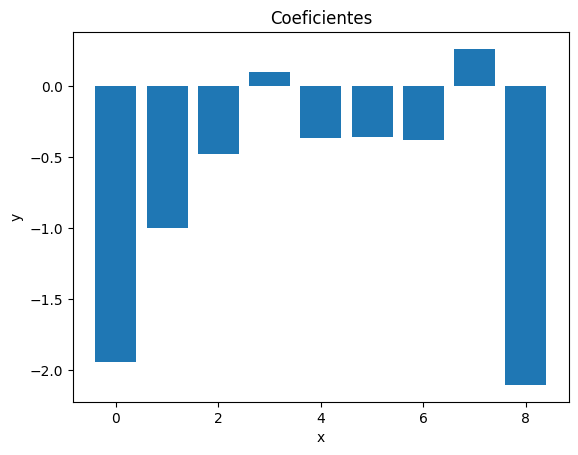

In [116]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [61]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [117]:
predictions = model.predict(X_test)

In [118]:
print(confusion_matrix(y_test, predictions))

[[401   0]
 [312  87]]


In [119]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.61
precision:  1.0
recall 0.22
f1_score:  0.36
matthews_score:  0.35


In [120]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [121]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [122]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.750000 (0.068251)
Logistic Regression: 0.890000 (0.056831)
Logistic Regression: 0.810000 (0.042599)


In [124]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.600000 (0.072595)


In [69]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [70]:
model = linear_model.LogisticRegression().fit(X_train,y_train)

In [71]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer.shap_values(X_test)

In [72]:
explainer.expected_value

-0.02929892843302173

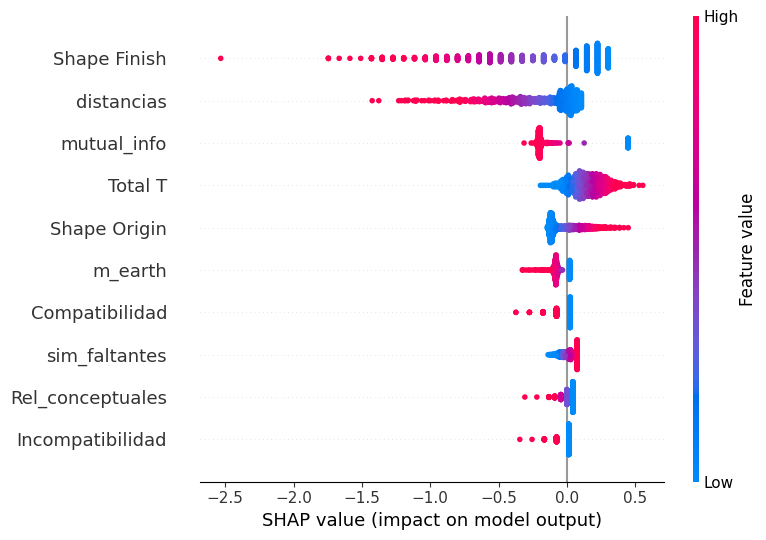

In [73]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       401
           1       0.86      1.00      0.92       399

    accuracy                           0.92       800
   macro avg       0.93      0.92      0.91       800
weighted avg       0.93      0.92      0.91       800



In [64]:
print(confusion_matrix(y_test, y_predict))

[[334  67]
 [  1 398]]
